#### Importing Different Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Impot the CSV Data as Pandas Dataframe

In [4]:
df = pd.read_csv('data/stud.csv')

#### Shape of the dataset

In [5]:
df.shape

(1000, 8)

#### Basic Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Data Checks to Perform

#### Check Missing Value

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing value in the data set

#### Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

There is no duplocates in the data set

### Check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Checking the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Check statistics of the data set

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Insight
 - From above desrciption of the numerical data all the mean are  close to each other btween 66 - 68.05
 - All standard deviations are also close to each other

### Exploring Data

In [12]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

###

In [13]:
print('Category in gender variable ',end=' ')
print(df['gender'].unique())

print('Category in  race_ethnicity ',end=' ')
print(df['race_ethnicity'].unique())

print('Category in parental_level_of_education variable ',end=' ')
print(df['parental_level_of_education'].unique())

print('Category in  lunch ',end=' ')
print(df['lunch'].unique())

print('Category in  test_preparation_course ',end=' ')
print(df['test_preparation_course'].unique())

Category in gender variable  ['female' 'male']
Category in  race_ethnicity  ['group B' 'group C' 'group A' 'group D' 'group E']
Category in parental_level_of_education variable  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Category in  lunch  ['standard' 'free/reduced']
Category in  test_preparation_course  ['none' 'completed']


In [14]:
#defining categorical and numerical feature
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='object']
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='object']

print(f'We have {len(categorical_feature)} categorical feature: {categorical_feature}')
print(f'We have {len(numerical_feature)} categorical feature: {numerical_feature}')

We have 5 categorical feature: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
We have 3 categorical feature: ['math_score', 'reading_score', 'writing_score']


#### Adding Column for Total Score and Average Score

In [15]:
df['Total_Score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['Average_Score'] = df['Total_Score']/3

In [16]:
df.rename(columns={'Total_Score':'total_score','Average_Score':'average_score'},inplace=True)

In [17]:
math_full=df[df['math_score']==100]['average_score'].count()
reading_full=df[df['reading_score']==100]['average_score'].count()
writing_full=df[df['writing_score']==100]['average_score'].count()

print(f'Number of sutdents got full marks in math is {math_full}')
print(f'Number of sutdents got full marks in reading is {reading_full}')
print(f'Number of sutdents got full marks in writing is {writing_full}')

Number of sutdents got full marks in math is 7
Number of sutdents got full marks in reading is 17
Number of sutdents got full marks in writing is 14


In [18]:
math_less_20 = df[df['math_score']<=20]['average_score'].count()
reading_less_20 = df[df['reading_score']<=20]['average_score'].count()
writing_less_20 = df[df['writing_score']<=20]['average_score'].count()

print(f'Number of students got marks less than 20 in math is {math_less_20}')
print(f'Number of students got marks less than 20 in reading is {reading_less_20}')
print(f'Number of students got marks less than 20 in wrting is {writing_less_20}')

Number of students got marks less than 20 in math is 4
Number of students got marks less than 20 in reading is 1
Number of students got marks less than 20 in wrting is 3


Insight
  - Students have perform worst in math
  - Best performance in reading section

### Visualization

#### Histogram and KDE

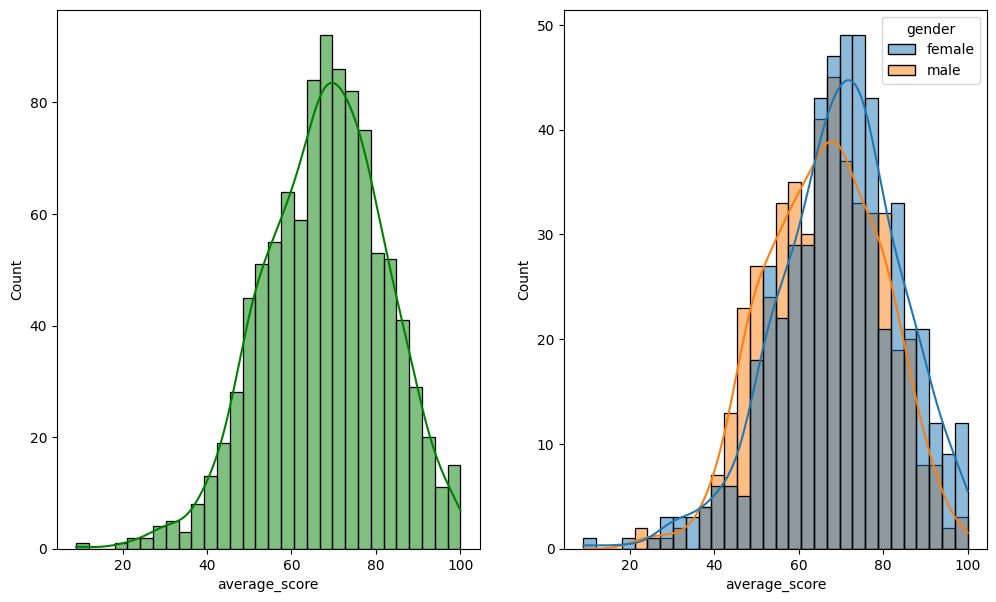

In [19]:
fig,ax = plt.subplots(1,2,figsize=(12,7))
plt.subplot(121)
sns.histplot(df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(df,x='average_score',bins=30,kde=True,hue='gender')
plt.show()

Insights
 - Female students tends to perform well than male students

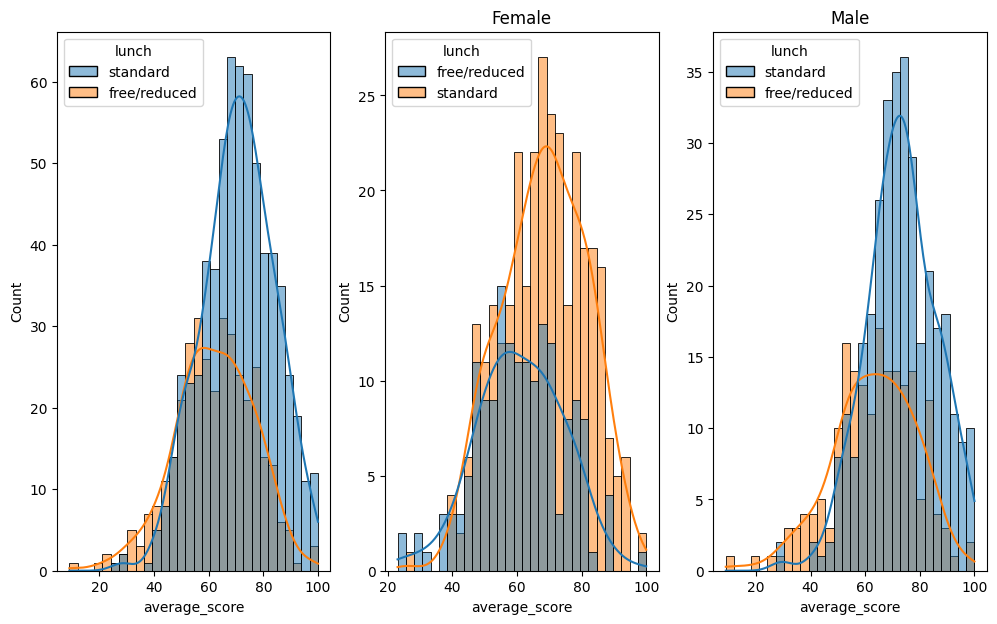

In [20]:
fig,ax = plt.subplots(1,3,figsize=(12,7))
plt.subplot(131)
sns.histplot(df,x='average_score',bins=30,kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(df[df['gender']=='male'],x='average_score',bins=30,kde=True,hue='lunch')
plt.title('Female')
plt.subplot(133)
sns.histplot(df[df['gender']=='female'],x='average_score',bins=30,kde=True,hue='lunch')
plt.title('Male')
plt.show()


Insights
 - Standard lunch helps to get good marks

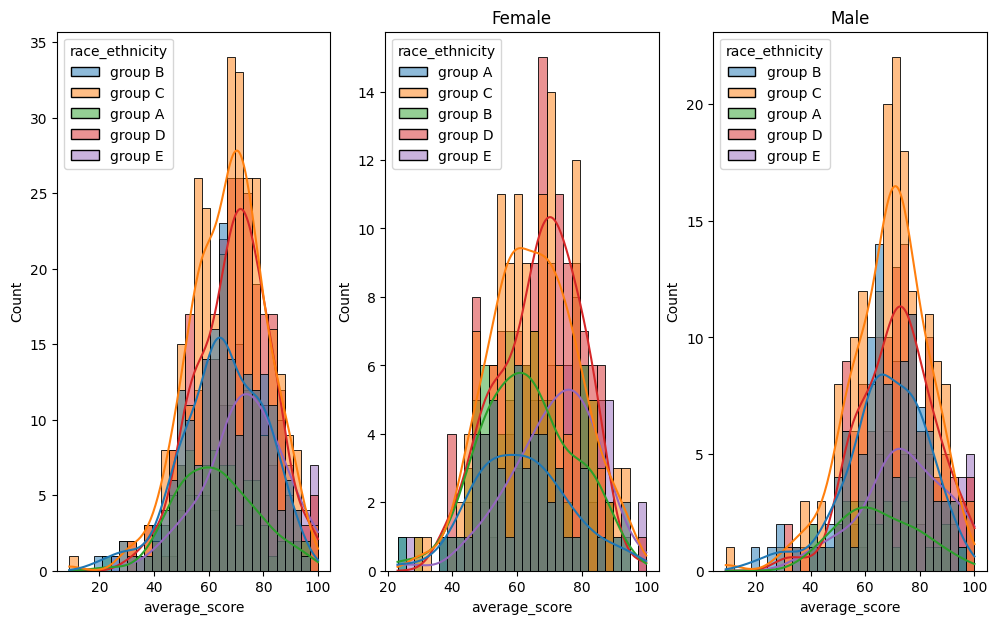

In [21]:
fig,ax = plt.subplots(1,3,figsize=(12,7))
plt.subplot(131)
sns.histplot(df,x='average_score',bins=30,kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(df[df['gender']=='male'],x='average_score',bins=30,kde=True,hue='race_ethnicity')
plt.title('Female')
plt.subplot(133)
sns.histplot(df[df['gender']=='female'],x='average_score',bins=30,kde=True,hue='race_ethnicity')
plt.title('Male')
plt.show()

Insights
 - Students of group A, B and E perform poorly in exam irrespective of male and female

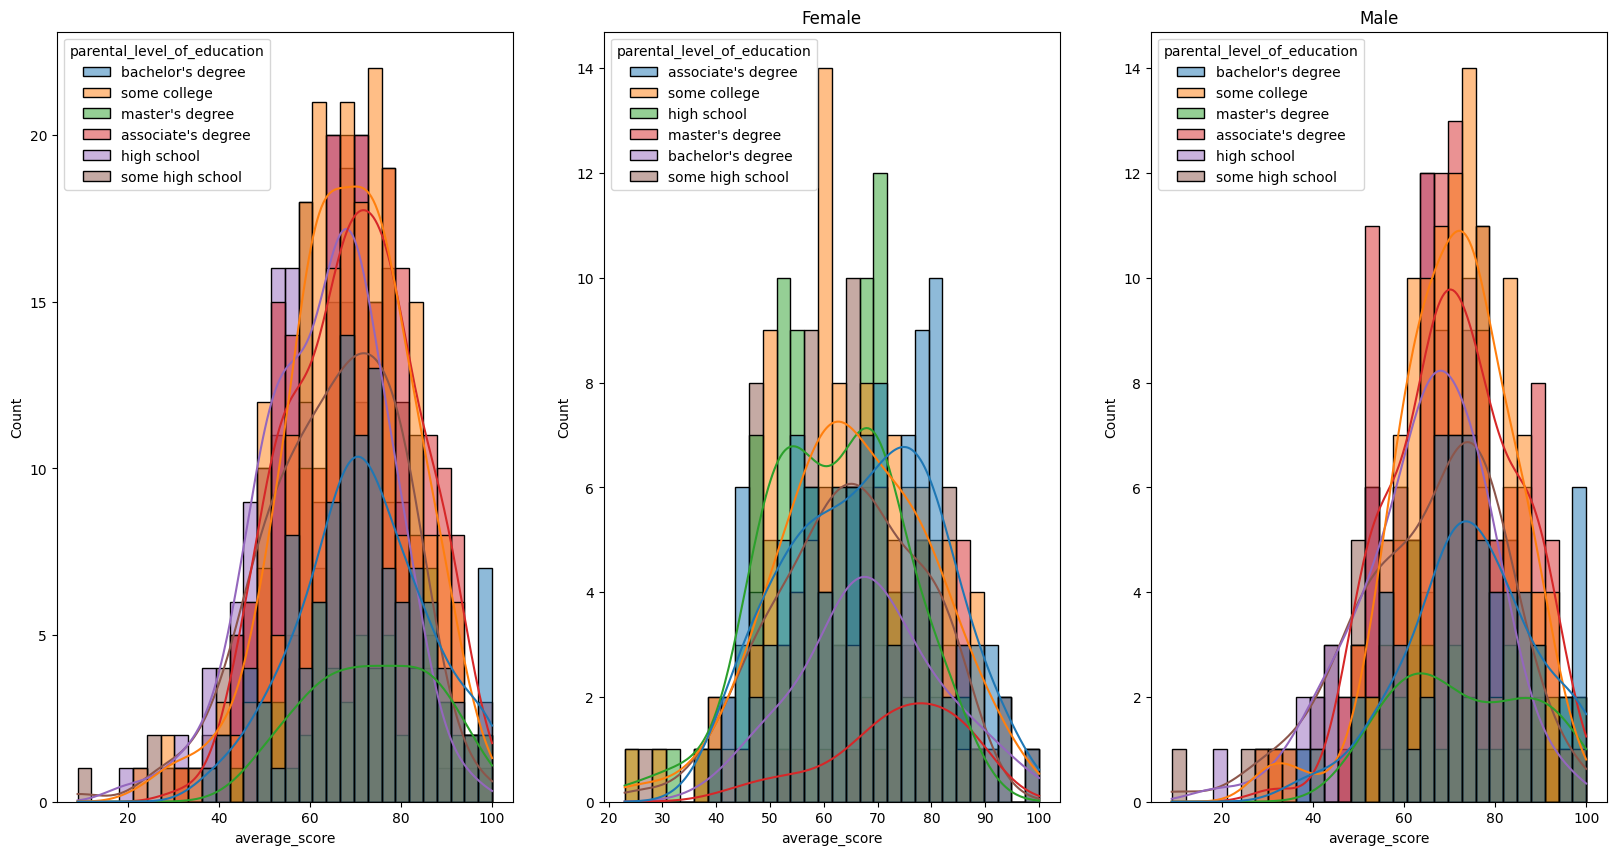

In [22]:
fig,ax = plt.subplots(1,3,figsize=(20,10))
plt.subplot(131)
sns.histplot(df,x='average_score',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(df[df['gender']=='male'],x='average_score',bins=30,kde=True,hue='parental_level_of_education')
plt.title('Female')
plt.subplot(133)
sns.histplot(df[df['gender']=='female'],x='average_score',bins=30,kde=True,hue='parental_level_of_education')
plt.title('Male')
plt.show()

Insights
 - Students whose parents have masters degree perform poorly in exam though parents education level does not affect children

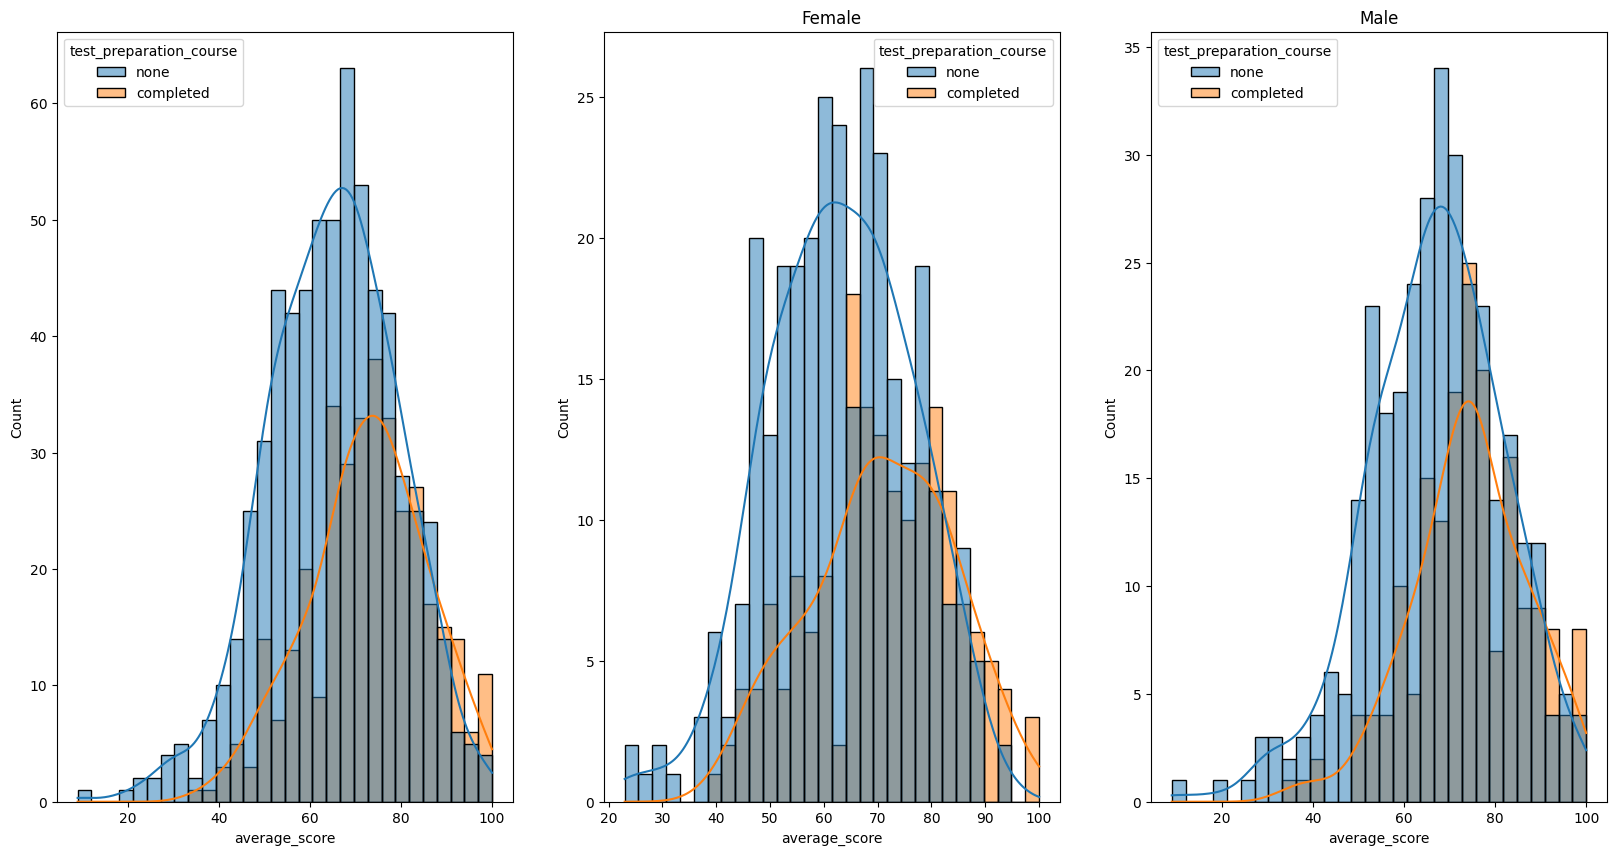

In [23]:
fig,ax = plt.subplots(1,3,figsize=(20,10))
plt.subplot(131)
sns.histplot(df,x='average_score',bins=30,kde=True,hue='test_preparation_course')
plt.subplot(132)
sns.histplot(df[df['gender']=='male'],x='average_score',bins=30,kde=True,hue='test_preparation_course')
plt.title('Female')
plt.subplot(133)
sns.histplot(df[df['gender']=='female'],x='average_score',bins=30,kde=True,hue='test_preparation_course')
plt.title('Male')
plt.show()

Insights
 - Students who have no test preparation course have done better in the exam than who have.

#### Maximum score of students in all three subject

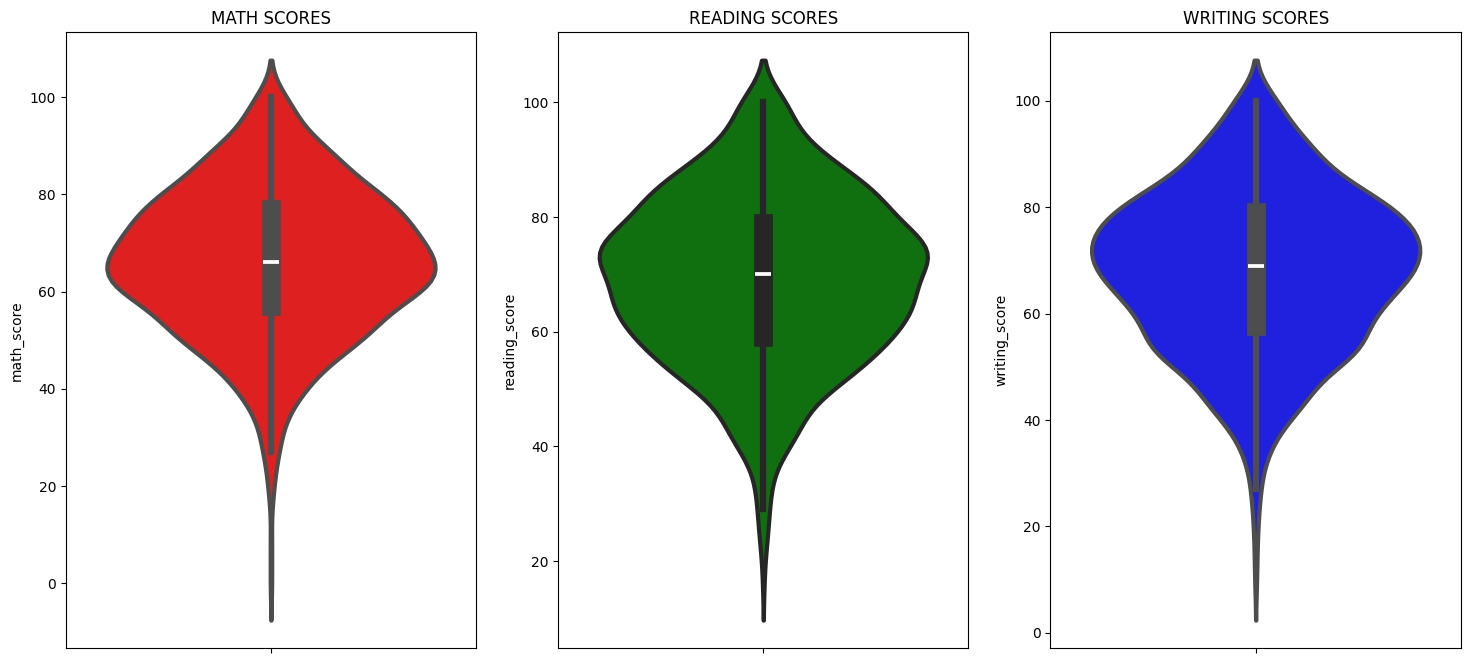

In [24]:

plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insight
- Most of the students score in all three subject within 50 - 80

#### Multivariate analysis using pie plot

In [25]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [26]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [27]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [28]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [29]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Text(0.5, 1.0, 'Lunch')

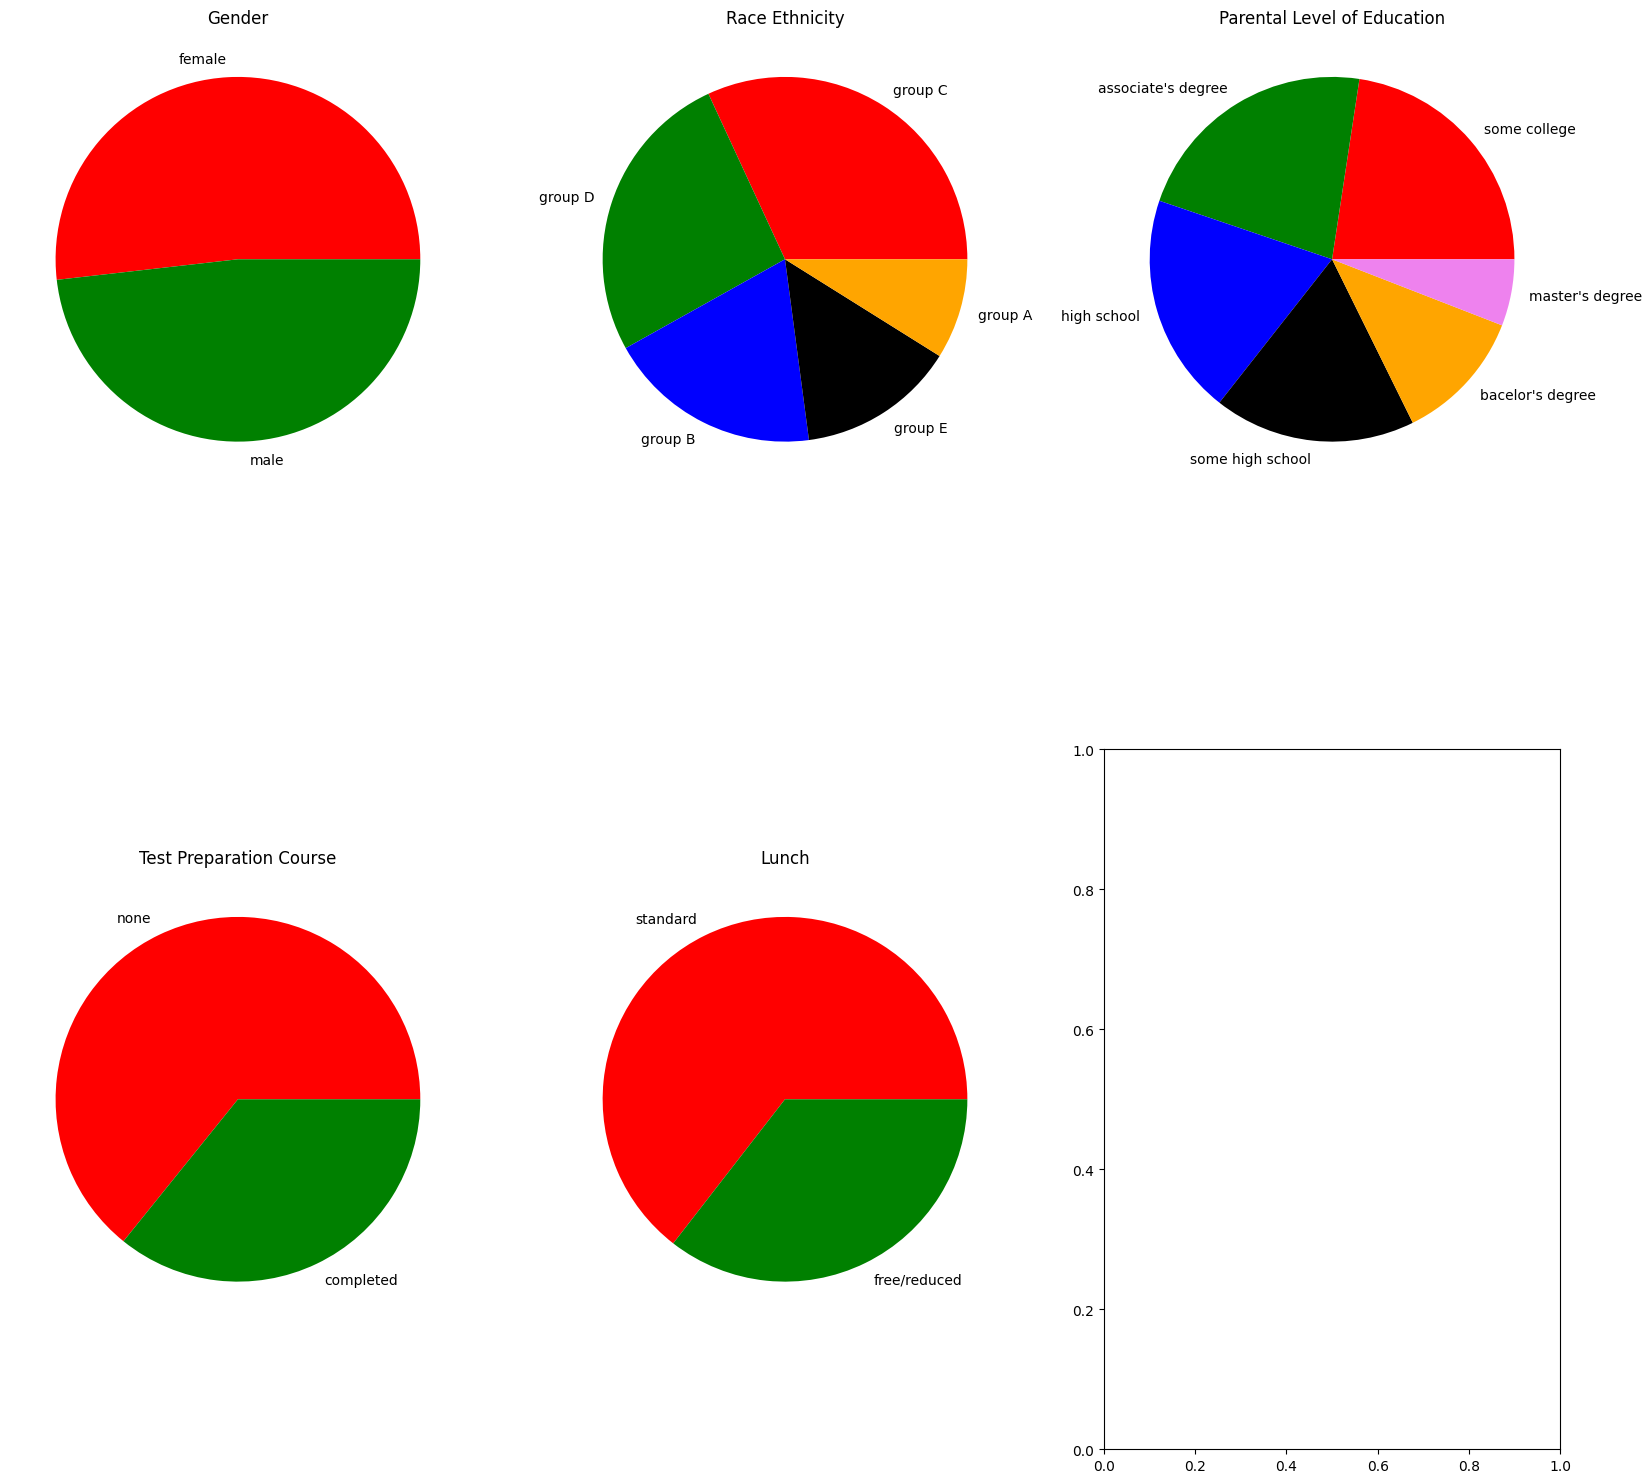

In [30]:
fig,ax = plt.subplots(2,3,figsize=(20,20))

#plt.subplot(131)
size=df['gender'].value_counts()
label = ['female','male']
color = ['red','green']

ax[0,0].pie(size,labels=label,colors=color)
ax[0,0].set_title('Gender')

#plt.subplot(132)
size=df['race_ethnicity'].value_counts()
label = ['group C','group D','group B','group E','group A']
color = ['red','green','blue','black','orange']

ax[0,1].pie(size,labels=label,colors=color)
ax[0,1].set_title('Race Ethnicity')

#plt.subplot(133)
size=df['parental_level_of_education'].value_counts()
label = ['some college','associate\'s degree','high school','some high school','bacelor\'s degree','master\'s degree']
color = ['red','green','blue','black','orange','violet']

ax[0,2].pie(size,labels=label,colors=color)
ax[0,2].set_title('Parental Level of Education')

#plt.subplot(232)
size=df['test_preparation_course'].value_counts()
label = ['none','completed']
color = ['red','green']

ax[1,0].pie(size,labels=label,colors=color)
ax[1,0].set_title('Test Preparation Course')

#plt.subplot(232)
size=df['lunch'].value_counts()
label = ['standard','free/reduced']
color = ['red','green']

ax[1,1].pie(size,labels=label,colors=color)
ax[1,1].set_title('Lunch')


#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Univariate Analysis ( How is the distribution of Gender?)

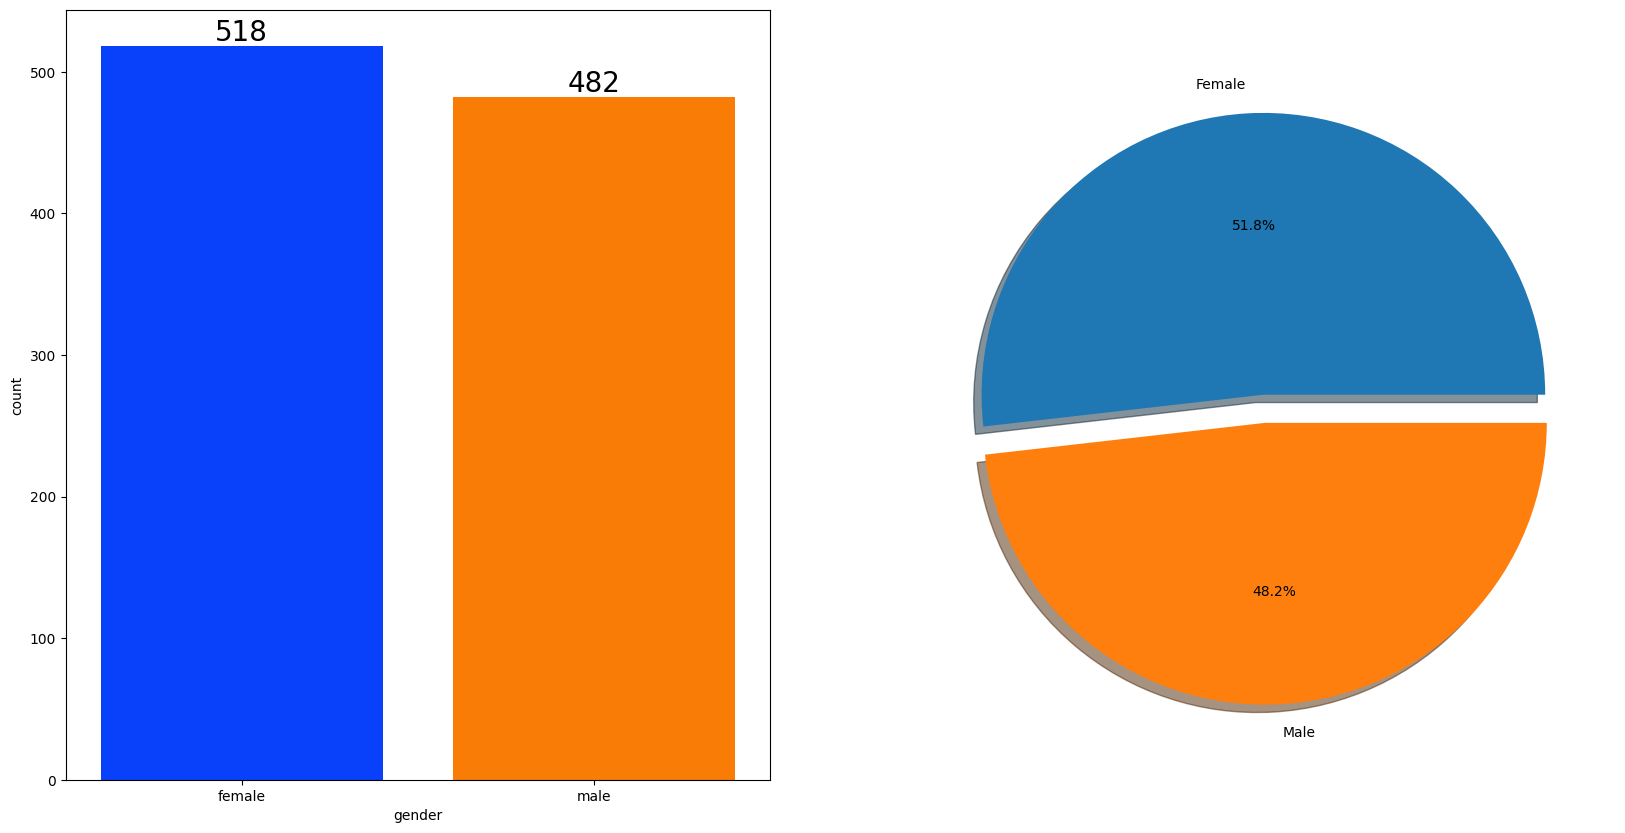

In [31]:
fig, ax =plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)

for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=20)
  
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],autopct='%1.1f%%',explode=[0,0.1],shadow=True)
plt.show()

Insights
- Gender has balanced data with 48.2% male and 51.8% female

#### Bivariate Analysis (Is gender has any effect on the performance?)

In [32]:
gender_grp = df.groupby('gender').agg({'math_score':'mean','reading_score':'mean','writing_score':'mean','total_score':'mean','average_score':'mean'}).reset_index()
gender_grp

,gender,math_score,reading_score,writing_score,total_score,average_score
0,female,63.633205,72.608108,72.467181,208.708494,69.569498
1,male,68.728216,65.473029,63.311203,197.512448,65.837483


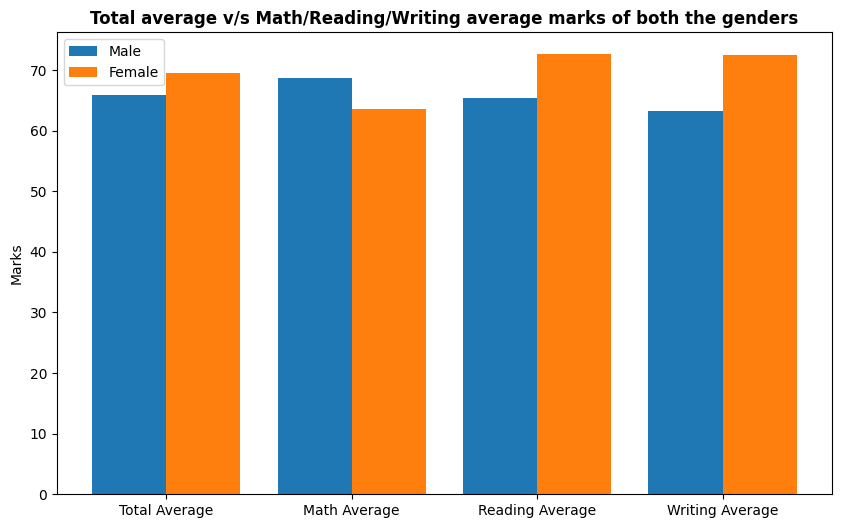

In [33]:
plt.figure(figsize=(10, 6))

X = ['Total Average','Math Average','Reading Average','Writing Average']
X_axis = np.arange(len(X))


female_scores = [
    gender_grp['average_score'][0], 
    gender_grp['math_score'][0], 
    gender_grp['reading_score'][0],
    gender_grp['writing_score'][0]
]
male_scores = [
    gender_grp['average_score'][1], 
    gender_grp['math_score'][1], 
    gender_grp['reading_score'][1],
    gender_grp['writing_score'][1]
]
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math/Reading/Writing average marks of both the genders", fontweight='bold')
plt.legend()


Insights
- On average female have better score than male
- For math male did better than female

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

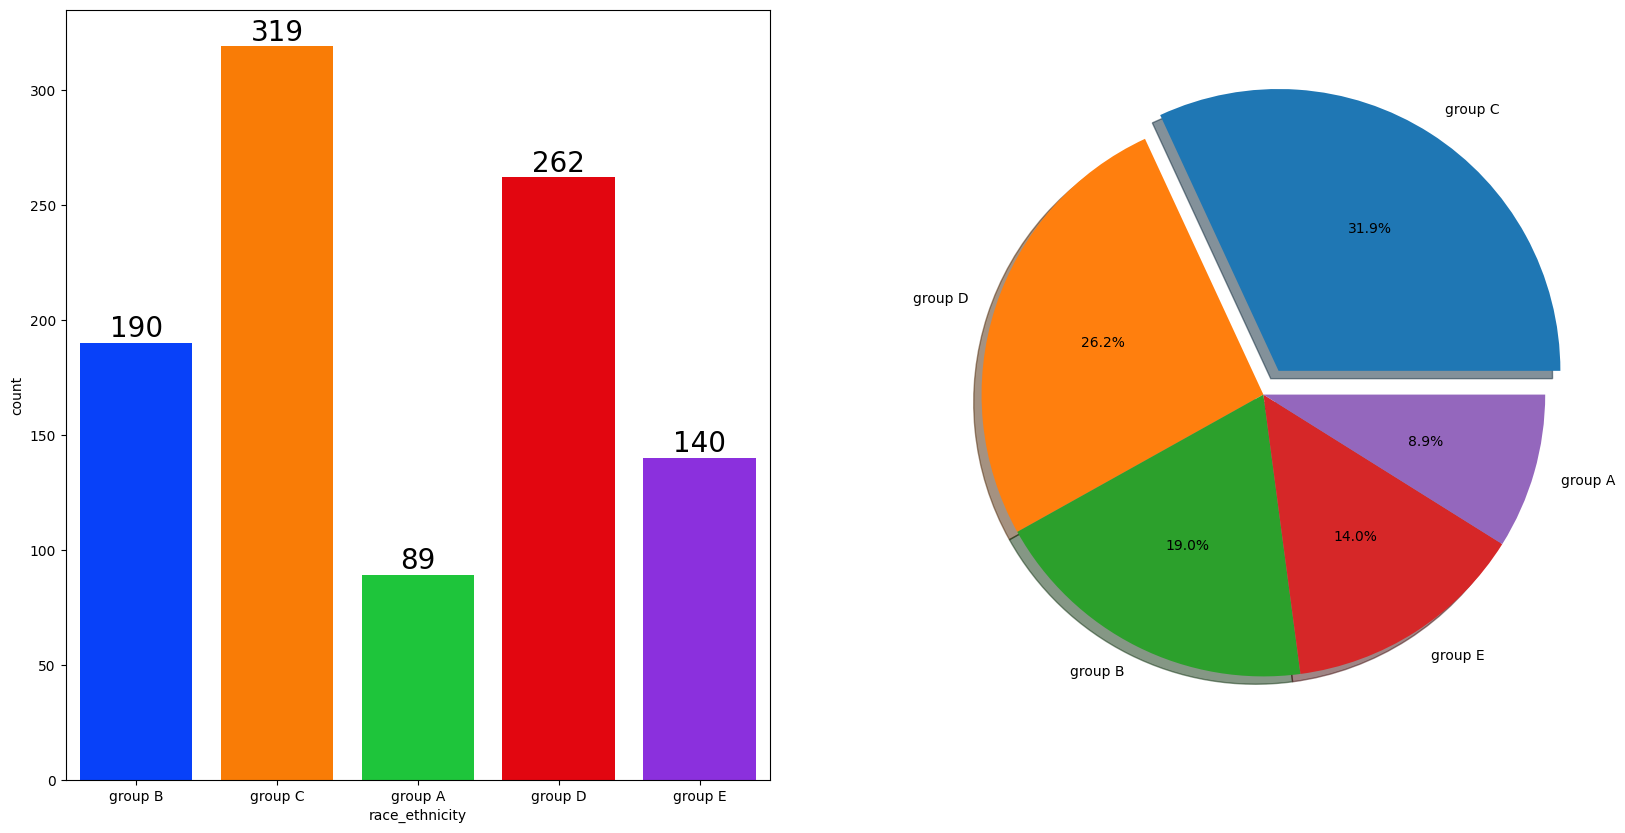

In [34]:
fig,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['race_ethnicity'],ax=ax[0],palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(df['race_ethnicity'].value_counts(),autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0,0],labels=['group C','group D','group B','group E','group A'])
plt.show()

Insights
- Most of the students are from Group C and Group D
- Lowest number of students from Group A

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

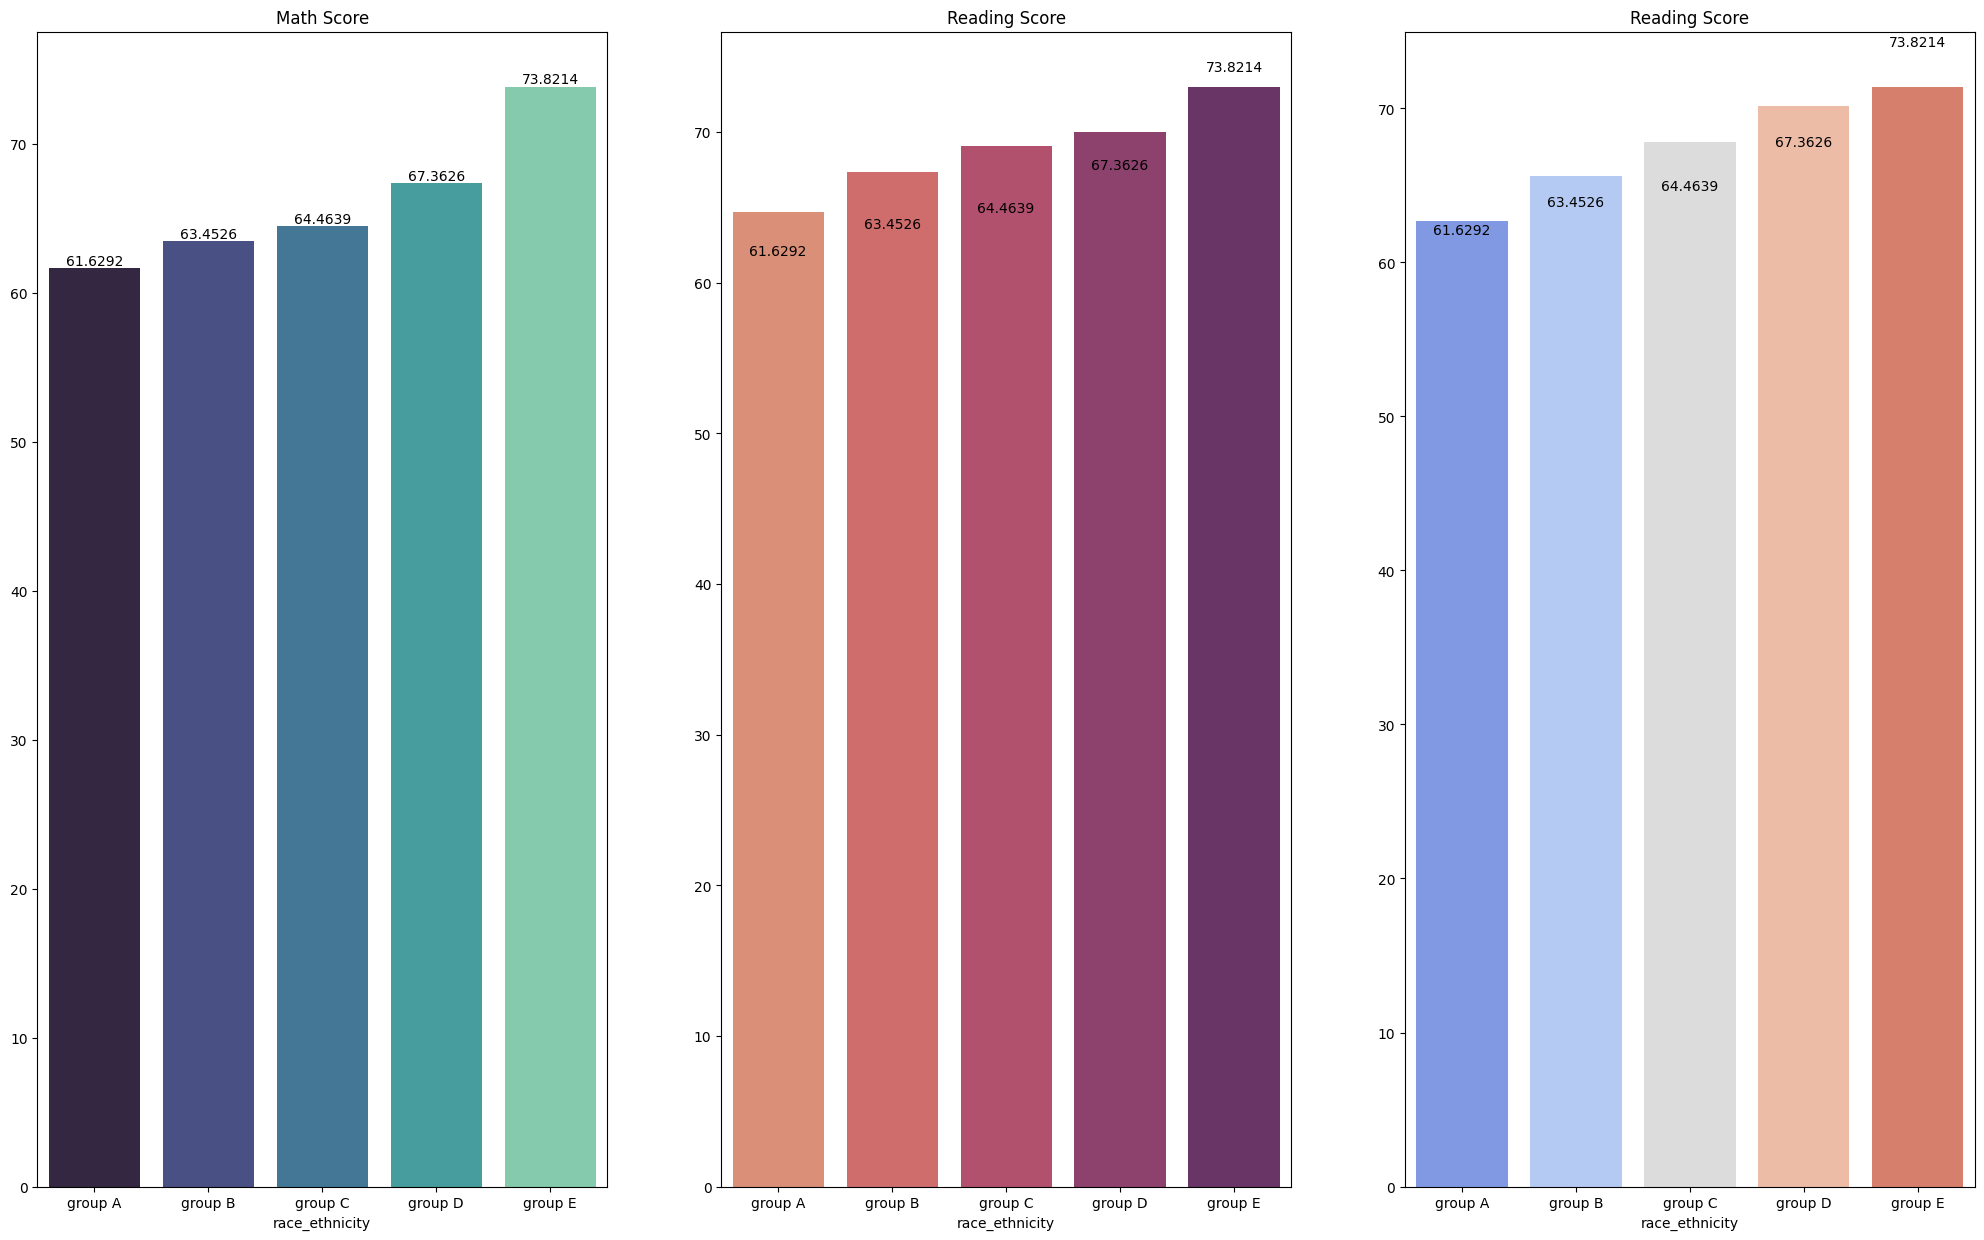

In [39]:
group_data = df.groupby('race_ethnicity')
fig,ax=plt.subplots(1,3,figsize=(25,15))
sns.barplot(x=group_data['math_score'].mean().index,y=group_data['math_score'].mean().values,ax=ax[0],palette='mako')
ax[0].set_title('Math Score')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
sns.barplot(x=group_data['reading_score'].mean().index,y=group_data['reading_score'].mean().values,ax=ax[1],palette='flare')
ax[1].set_title('Reading Score')
for container in ax[0].containers:
    ax[1].bar_label(container,color='black',size=10)
    
sns.barplot(x=group_data['writing_score'].mean().index,y=group_data['writing_score'].mean().values,ax=ax[2],palette='coolwarm')
ax[2].set_title('Reading Score')
for container in ax[0].containers:
    ax[2].bar_label(container,color='black',size=10)

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

In [42]:
df['parental_level_of_education'].value_counts().index

Index(['some college', 'associate's degree', 'high school', 'some high school',
       'bachelor's degree', 'master's degree'],
      dtype='object', name='parental_level_of_education')

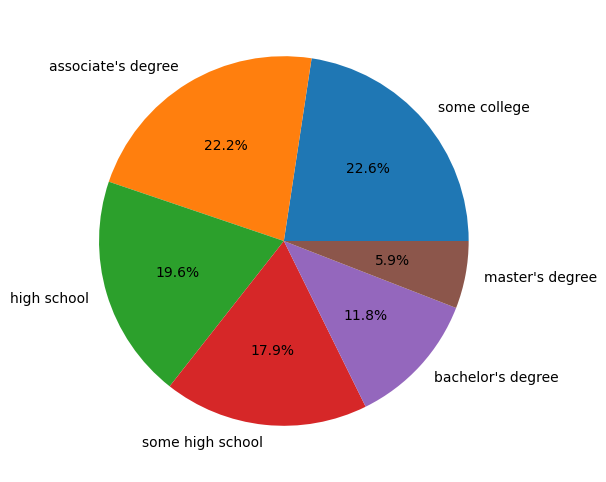

In [45]:
plt.figure(figsize=(10,6))
plt.pie(x=df['parental_level_of_education'].value_counts().values,labels=df['parental_level_of_education'].value_counts().index,autopct='%1.1f%%')
plt.show()

Insight
- Largest number are from some college

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

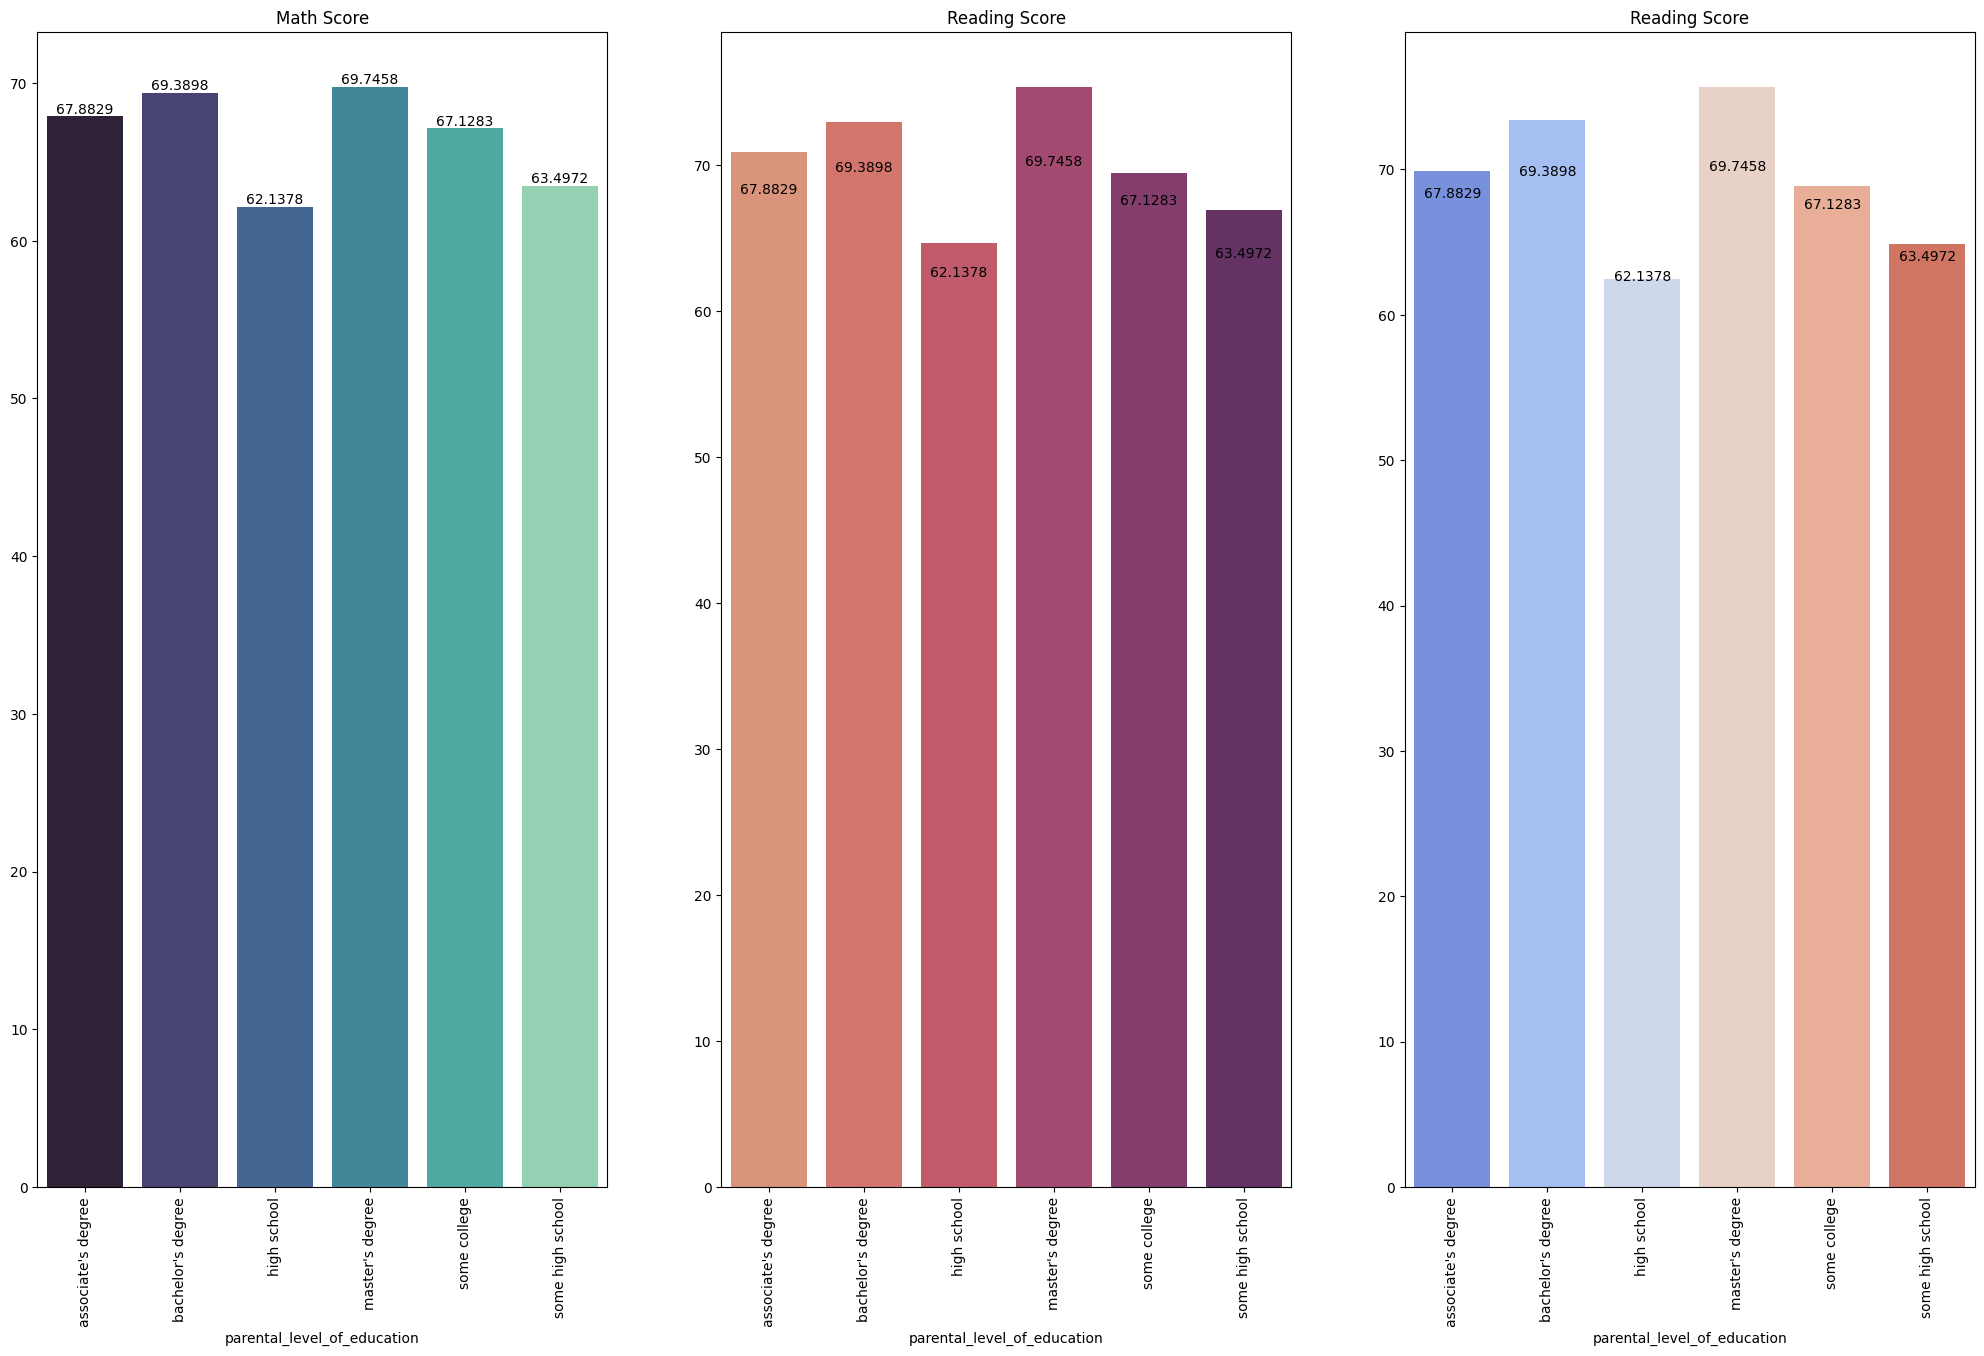

In [54]:
group_data = df.groupby('parental_level_of_education')
fig,ax=plt.subplots(1,3,figsize=(25,15))
sns.barplot(x=group_data['math_score'].mean().index,y=group_data['math_score'].mean().values,ax=ax[0],palette='mako')
ax[0].set_title('Math Score')
ax[0].set_xticklabels(group_data['math_score'].mean().index,rotation=90)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
sns.barplot(x=group_data['reading_score'].mean().index,y=group_data['reading_score'].mean().values,ax=ax[1],palette='flare')
ax[1].set_title('Reading Score')
ax[1].set_xticklabels(group_data['math_score'].mean().index,rotation=90)
for container in ax[0].containers:
    ax[1].bar_label(container,color='black',size=10)
    
sns.barplot(x=group_data['writing_score'].mean().index,y=group_data['writing_score'].mean().values,ax=ax[2],palette='coolwarm')
ax[2].set_title('Reading Score')
ax[2].set_xticklabels(group_data['math_score'].mean().index,rotation=90)
for container in ax[0].containers:
    ax[2].bar_label(container,color='black',size=10)

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

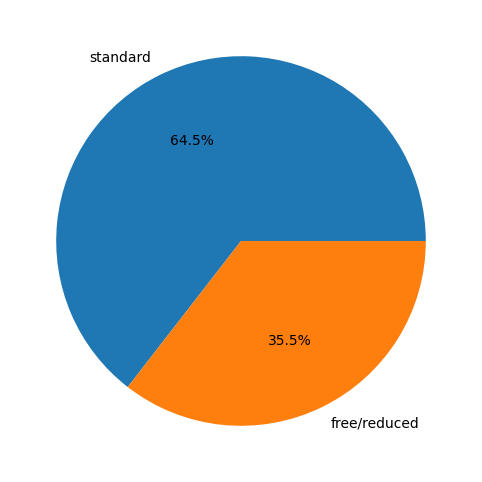

In [55]:
plt.figure(figsize=(10,6))
plt.pie(x=df['lunch'].value_counts().values,labels=df['lunch'].value_counts().index,autopct='%1.1f%%')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

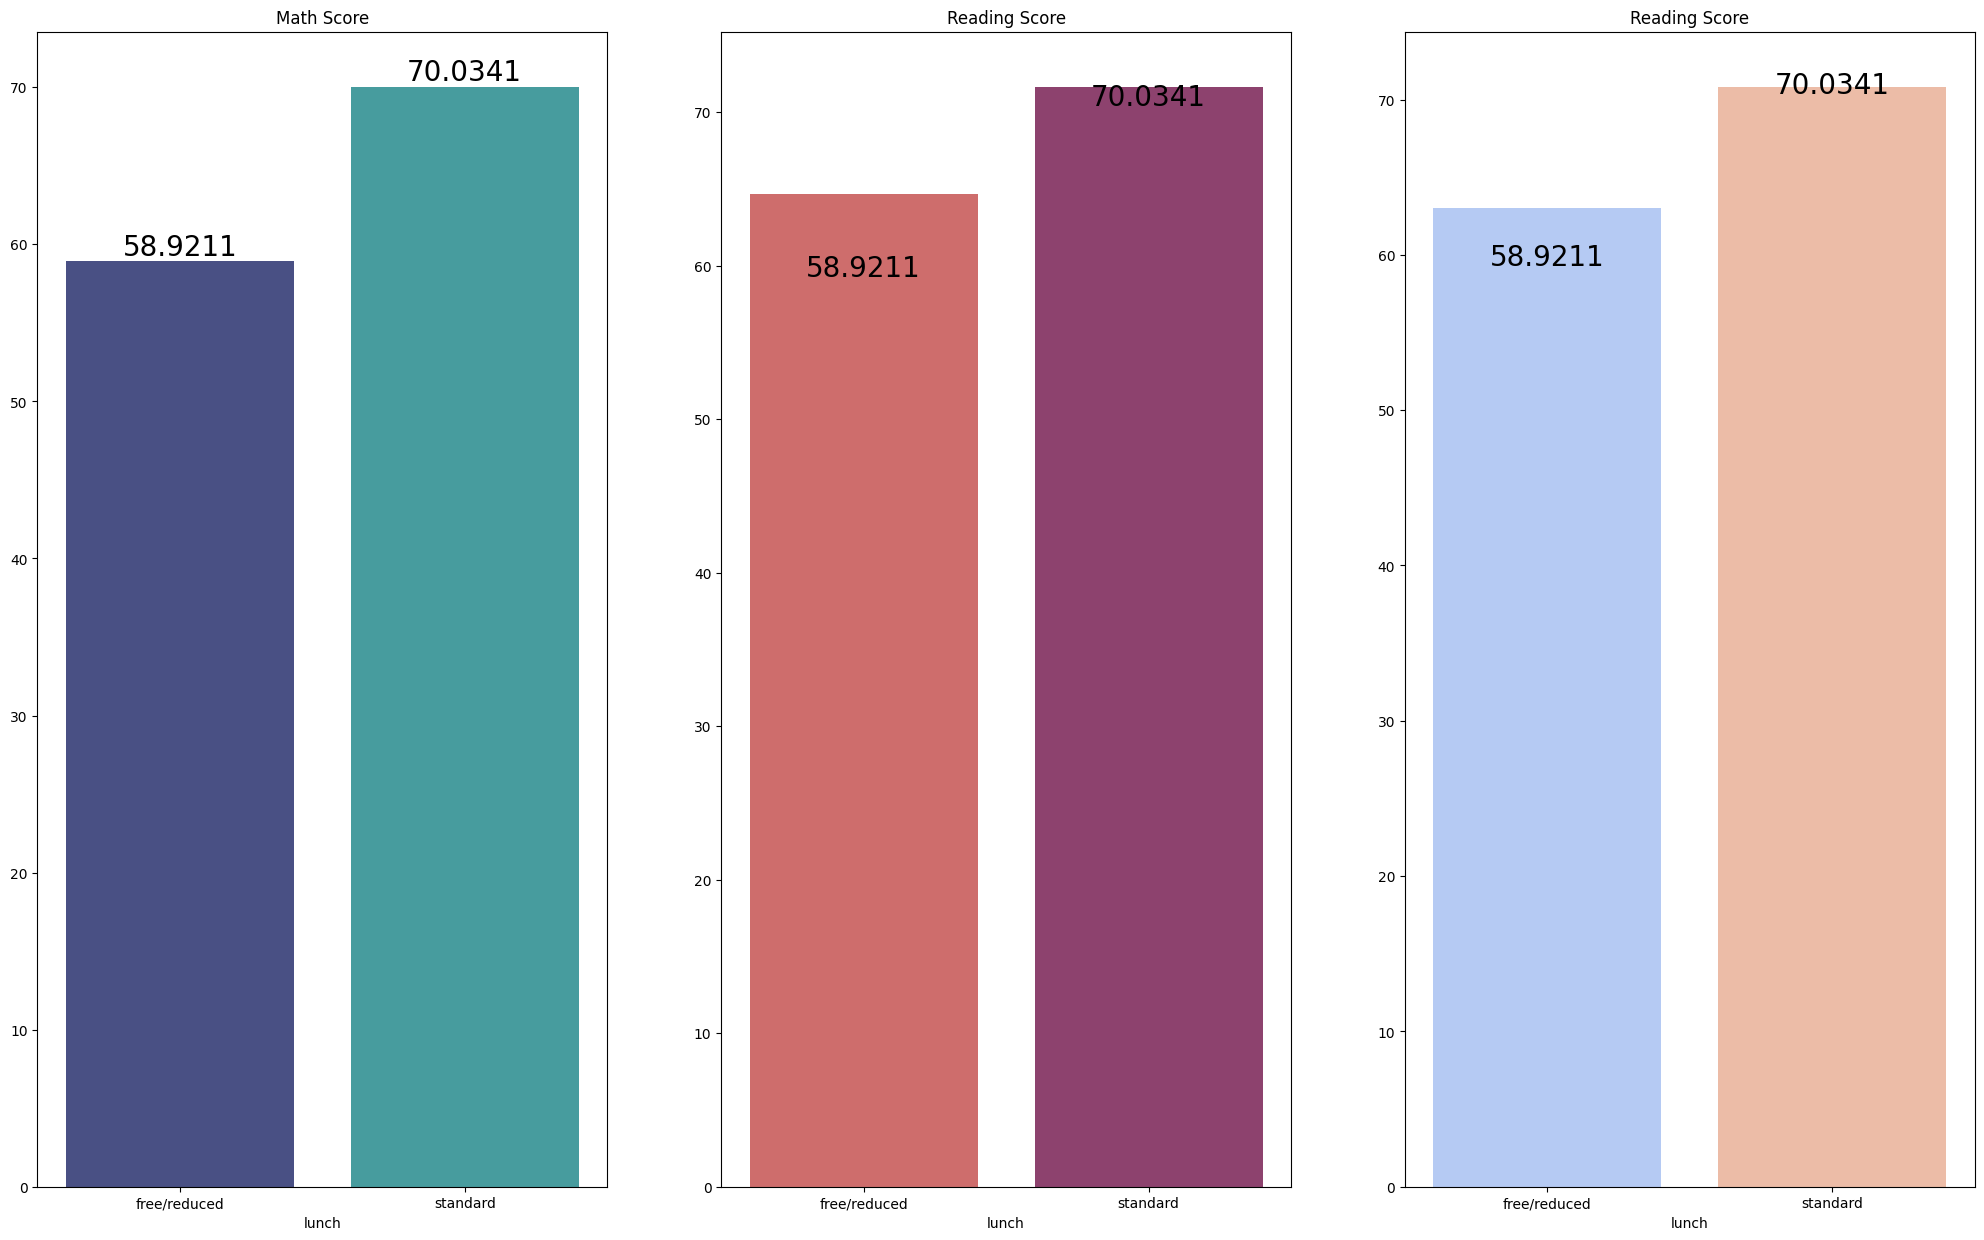

In [57]:
group_data = df.groupby('lunch')
fig,ax=plt.subplots(1,3,figsize=(25,15))
sns.barplot(x=group_data['math_score'].mean().index,y=group_data['math_score'].mean().values,ax=ax[0],palette='mako')
ax[0].set_title('Math Score')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.barplot(x=group_data['reading_score'].mean().index,y=group_data['reading_score'].mean().values,ax=ax[1],palette='flare')
ax[1].set_title('Reading Score')
for container in ax[0].containers:
    ax[1].bar_label(container,color='black',size=20)
    
sns.barplot(x=group_data['writing_score'].mean().index,y=group_data['writing_score'].mean().values,ax=ax[2],palette='coolwarm')
ax[2].set_title('Reading Score')
for container in ax[0].containers:
    ax[2].bar_label(container,color='black',size=20)

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

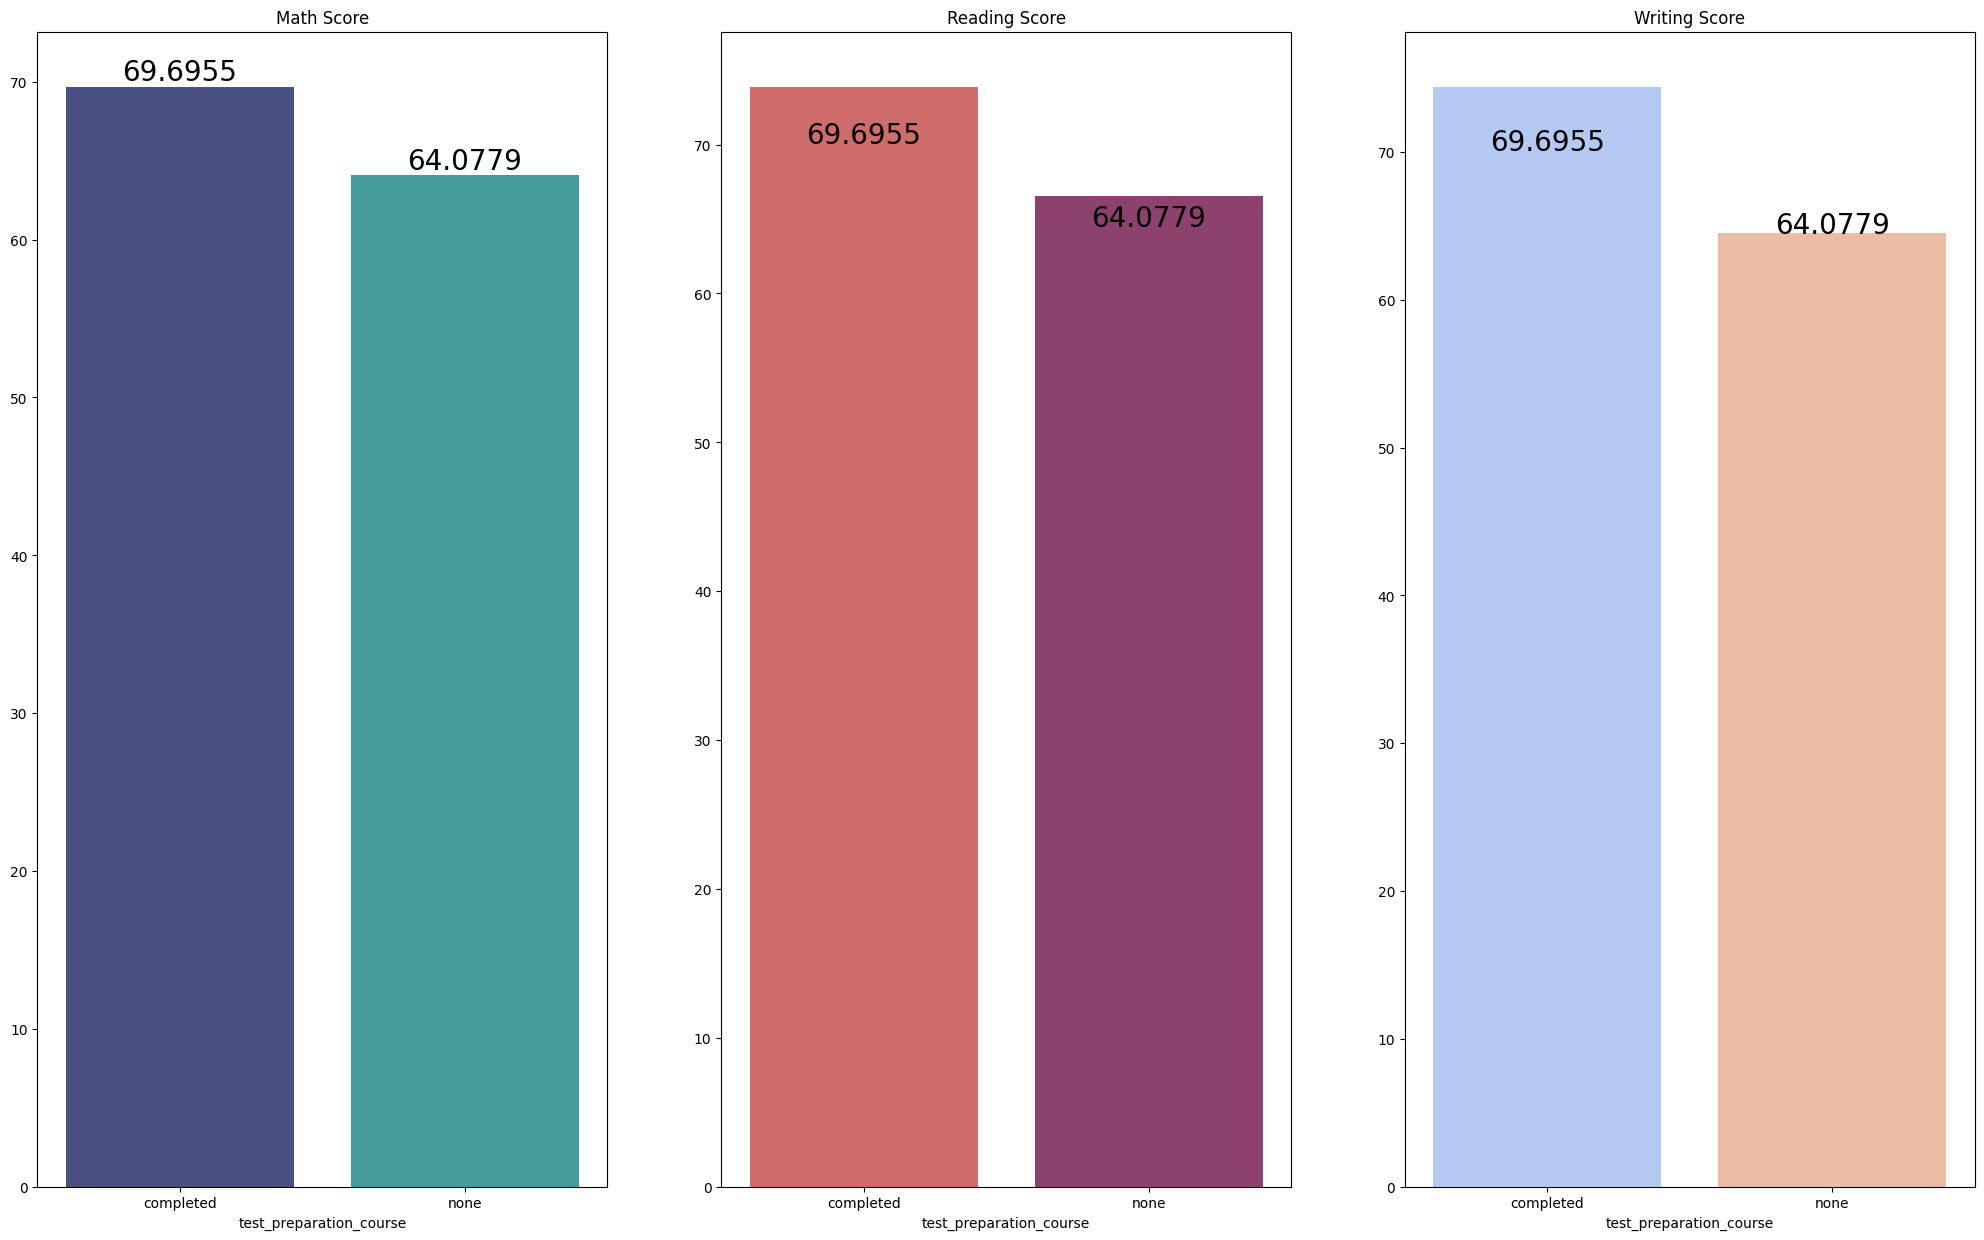

In [59]:
group_data = df.groupby('test_preparation_course')
fig,ax=plt.subplots(1,3,figsize=(25,15))
sns.barplot(x=group_data['math_score'].mean().index,y=group_data['math_score'].mean().values,ax=ax[0],palette='mako')
ax[0].set_title('Math Score')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.barplot(x=group_data['reading_score'].mean().index,y=group_data['reading_score'].mean().values,ax=ax[1],palette='flare')
ax[1].set_title('Reading Score')
for container in ax[0].containers:
    ax[1].bar_label(container,color='black',size=20)
    
sns.barplot(x=group_data['writing_score'].mean().index,y=group_data['writing_score'].mean().values,ax=ax[2],palette='coolwarm')
ax[2].set_title('Writing Score')
for container in ax[0].containers:
    ax[2].bar_label(container,color='black',size=20)

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### Outlier Check

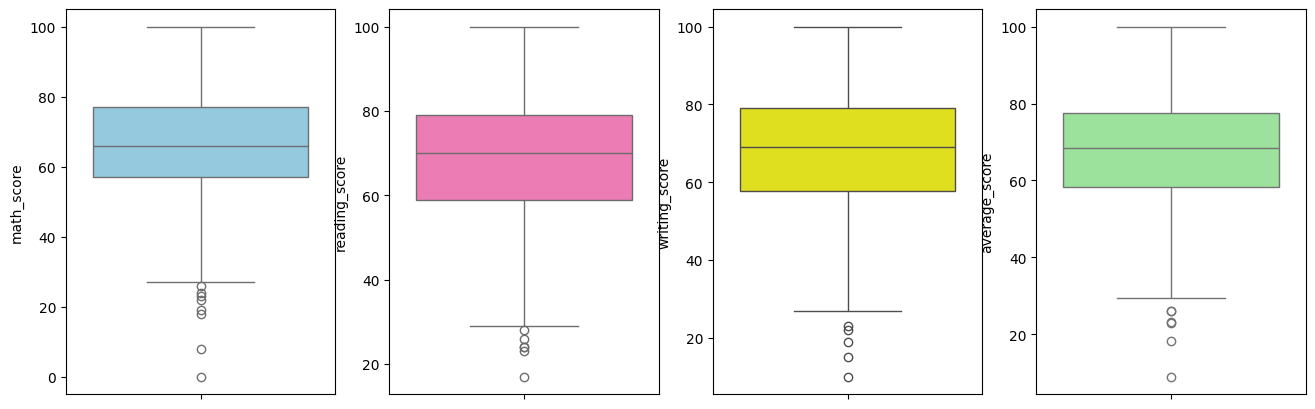

In [60]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

### Multivariate analysis using pair plot

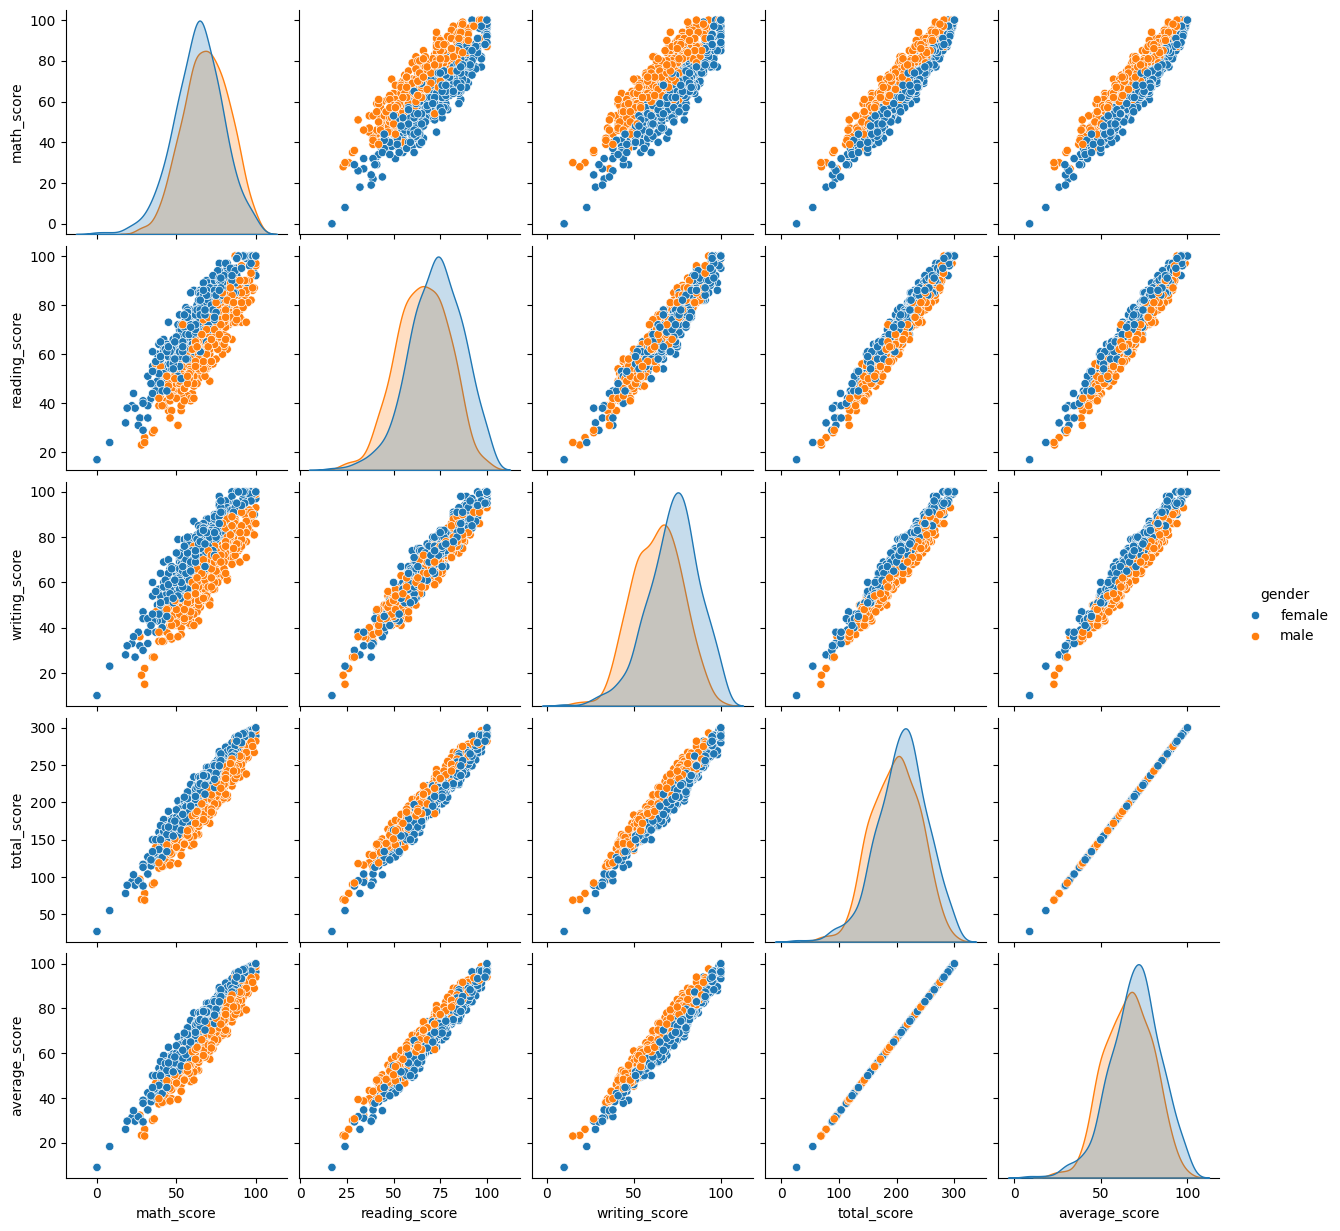

In [61]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.